In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [3]:
current_dir = os.getcwd()

In [4]:
try : 
    os.chdir(f'{current_dir}/Spotify_Radar_Playlist')
except Exception as e : 
    None

In [5]:
os.getcwd()

'c:\\Users\\bigbo\\Documents\\Computer Science\\00. Projets\\spotify_radar_playlist\\Spotify_Radar_Playlist'

In [6]:
df_track_info = pd.read_csv('stats/weekly_tracks_popularity.txt',sep=";")

#for mapping artist name and id to trakcs
df_track_artist = pd.read_csv('stats/weekly_tracks_artists.txt',sep=";")

#artist number of followers and popularity
df_artist_data = pd.read_csv('stats/weekly_artists_data.txt',sep=",")

df_genre = pd.read_csv('stats/weekly_artists_genres_agg.txt',sep=";")

df_added_at = pd.read_csv('stats/weekly_tracks_added_at.txt',sep=",")



In [7]:
df_spotify = df_track_info.merge(right=df_track_artist,on="track_id")
df_spotify = df_spotify.merge(right=df_added_at,on="track_id")
df_spotify = df_spotify.merge(right=df_artist_data,on="artist_id")
df_spotify = df_spotify.merge(right=df_genre,on="artist_id")

In [8]:
df_spotify.head()

,track_id,popularity,track_name,duration,artist_id,artist_name,added_at,total_follower,artist_popularity,artist_genres,artist_genre_main
0,3kFnwZHnMMNeO2YpOZyZVw,57,Hiding,222092,5tDjiBYUsTqzd0RkTZxK7u,Ben Böhmer,2024-12-20T07:00:26Z,602579,69,"['melodic house', 'melodic techno', 'progressi...",electro_dance
1,3kFnwZHnMMNeO2YpOZyZVw,57,Hiding,222092,6oBm8HB0yfrIc9IHbxs6in,Lykke Li,2024-12-20T07:00:26Z,1945599,71,[],unknown
2,6OlITNJTY5qvSjtJa684wc,29,Cream Of The Crop,246120,4OTD2AbOu5iBqSWk3NfwG5,Getdown Services,2024-12-20T07:00:26Z,26408,50,[],unknown
3,3jlacMjHZ9VGCOmz5CjHE0,55,Homie Don’t Shake,176213,3UtzOHYm3lQALkKzVD4wyO,Fcukers,2024-12-20T07:00:26Z,35499,49,[],unknown
4,4a2hgYLUWVoMDOrh08LQqW,25,Avanvera,412191,69zPIMRgsZieOHFtHtvnj0,Yu Su,2024-12-20T07:00:26Z,27368,34,[],unknown


test column format

In [9]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   track_id           1366 non-null   object
 1   popularity         1366 non-null   int64 
 2   track_name         1366 non-null   object
 3   duration           1366 non-null   int64 
 4   artist_id          1366 non-null   object
 5   artist_name        1366 non-null   object
 6   added_at           1366 non-null   object
 7   total_follower     1366 non-null   int64 
 8   artist_popularity  1366 non-null   int64 
 9   artist_genres      1366 non-null   object
 10  artist_genre_main  1366 non-null   object
dtypes: int64(4), object(7)
memory usage: 117.5+ KB


In [10]:
# to transform added_at field to proper date format
df_spotify['added_at']=pd.to_datetime(df_spotify['added_at'])

In [11]:
#to add a more readable duration field

def minute_seconds(x) : 
    rounded = round(x/1000)
    minutes = rounded//60
    seconds = rounded%60
    return str(str(minutes)+"""'"""+str(seconds))

df_spotify['duration_seconds']=round(df_spotify['duration']/1000)
df_spotify["minute_seconds"] = df_spotify["duration"].apply(minute_seconds)

In [12]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   track_id           1366 non-null   object             
 1   popularity         1366 non-null   int64              
 2   track_name         1366 non-null   object             
 3   duration           1366 non-null   int64              
 4   artist_id          1366 non-null   object             
 5   artist_name        1366 non-null   object             
 6   added_at           1366 non-null   datetime64[ns, UTC]
 7   total_follower     1366 non-null   int64              
 8   artist_popularity  1366 non-null   int64              
 9   artist_genres      1366 non-null   object             
 10  artist_genre_main  1366 non-null   object             
 11  duration_seconds   1366 non-null   float64            
 12  minute_seconds     1366 non-null   object       

In [13]:
df_genre_pie = df_spotify[['artist_id','artist_genre_main']].groupby("artist_genre_main").count().reset_index()
df_genre_pie.head()

,artist_genre_main,artist_id
0,electro_dance,69
1,folk_acoustic,15
2,hip_hop_rnb,143
3,metal,146
4,other,65


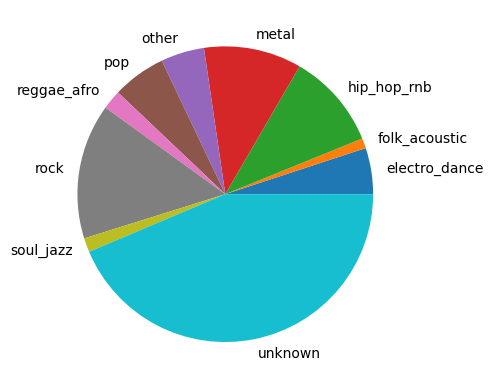

In [14]:
plt.figure()
plt.pie(x=df_genre_pie['artist_id'],labels=df_genre_pie['artist_genre_main'])
plt.show()

top 10 most popular tracks

In [15]:
df_popular_track = df_spotify[['track_name','popularity']].drop_duplicates(subset="track_name").sort_values(by="popularity",ascending=False).head(10)
df_popular_track.head(10)

,track_name,popularity
1159,Messy,92
1219,Dark Thoughts,92
541,luther (with sza),92
1247,What Was That,90
1124,DENIAL IS A RIVER,90
853,MONA LISA,89
276,Bed Chem,89
484,WELTiTA,89
1229,PUSH 2 START,88
799,The Giver,88


In [16]:
#to retrieve the newest tracks
df_new = df_spotify[df_spotify["added_at"] == max(df_spotify["added_at"])]
df_new.head()

,track_id,popularity,track_name,duration,artist_id,artist_name,added_at,total_follower,artist_popularity,artist_genres,artist_genre_main,duration_seconds,minute_seconds
1311,4EJAOpNaoJGXLLnJFiCKaq,43,On It Goes,341250,4yrO1N273PlTaixa4BNwBz,Avalon Emerson,2025-05-08 18:51:16+00:00,58399,37,[],unknown,341.0,5'41
1312,4EJAOpNaoJGXLLnJFiCKaq,43,On It Goes,341250,0DgsuiMZylmPOYkrVOqNYQ,Storm Queen,2025-05-08 18:51:16+00:00,17324,43,[],unknown,341.0,5'41
1313,5gR6gTGOGsg9zcR7JhvwQz,64,Man Made of Meat,189947,2nAKP6etu8wXNnezKXgqgg,Viagra Boys,2025-05-08 18:51:16+00:00,384111,66,['post-punk'],rock,190.0,3'10
1314,4rZH9cj1B6B0xg3rlcAZBL,38,Atonement - feat. Will Ramos,232254,58d50jBQXhOetEGuSBgu64,Employed To Serve,2025-05-08 18:51:16+00:00,44883,40,['metalcore'],metal,232.0,3'52
1315,4rZH9cj1B6B0xg3rlcAZBL,38,Atonement - feat. Will Ramos,232254,0LQyNolD82BRJeXoEr4bwa,Will Ramos,2025-05-08 18:51:16+00:00,70186,47,"['deathcore', 'metalcore']",metal,232.0,3'52


In [23]:
df_sabrina = df_spotify[df_spotify["artist_name"]=="Sabrina Carpenter"]
df_sabrina.T

,276
track_id,1UHS8Rf6h5Ar3CDWRd3wjF
popularity,89
track_name,Bed Chem
duration,171869
artist_id,74KM79TiuVKeVCqs8QtB0B
artist_name,Sabrina Carpenter
added_at,2024-12-20 07:00:26+00:00
total_follower,22222141
artist_popularity,92
artist_genres,[]
